# Pandas Introduction

Pandas is a powerful library for data manipulation and analysis in Python. It provides data structures like Series and DataFrame for handling structured data.

In [2]:
import pandas as pd
import numpy as np

print("Pandas imported successfully!")
print(f"Pandas version: {pd.__version__}")

Pandas imported successfully!
Pandas version: 2.3.0


## Pandas Series

A Series is a one-dimensional labeled array that can hold any data type.

In [3]:
# Creating a Series
s = pd.Series([1, 3, 5, 6, 8])
print("Series:")
print(s)
print(f"Type: {type(s)}")

# Series with custom index
s_custom = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
print("\nSeries with custom index:")
print(s_custom)

# Accessing elements
print(f"s[0]: {s[0]}")
print(f"s_custom['b']: {s_custom['b']}")

# Basic operations
print(f"Mean: {s.mean()}")
print(f"Sum: {s.sum()}")
print(f"Max: {s.max()}")

Series:
0    1
1    3
2    5
3    6
4    8
dtype: int64
Type: <class 'pandas.core.series.Series'>

Series with custom index:
a    10
b    20
c    30
dtype: int64
s[0]: 1
s_custom['b']: 20
Mean: 4.6
Sum: 23
Max: 8


## Pandas DataFrame

A DataFrame is a two-dimensional labeled data structure with columns of potentially different types.

In [4]:
# Creating a DataFrame from dictionary
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['NYC', 'LA', 'Chicago']
}
df = pd.DataFrame(data)
print("DataFrame:")
print(df)
print(f"Type: {type(df)}")

# Basic info
print(f"\nShape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Index: {list(df.index)}")

# Accessing columns
print(f"\nNames: {df['Name'].tolist()}")
print(f"Ages: {df['Age'].tolist()}")

# Accessing rows
print(f"\nFirst row:\n{df.iloc[0]}")
print(f"Row with index 1:\n{df.loc[1]}")

# Summary statistics
print(f"\nAge statistics:\n{df['Age'].describe()}")

DataFrame:
      Name  Age     City
0    Alice   25      NYC
1      Bob   30       LA
2  Charlie   35  Chicago
Type: <class 'pandas.core.frame.DataFrame'>

Shape: (3, 3)
Columns: ['Name', 'Age', 'City']
Index: [0, 1, 2]

Names: ['Alice', 'Bob', 'Charlie']
Ages: [25, 30, 35]

First row:
Name    Alice
Age        25
City      NYC
Name: 0, dtype: object
Row with index 1:
Name    Bob
Age      30
City     LA
Name: 1, dtype: object

Age statistics:
count     3.0
mean     30.0
std       5.0
min      25.0
25%      27.5
50%      30.0
75%      32.5
max      35.0
Name: Age, dtype: float64


## Reading Data

Pandas can read data from various file formats like CSV, Excel, JSON, and SQL databases.

In [7]:
# Reading CSV file
df_csv = pd.read_csv('../data/sample_data.csv')
print("Data from CSV:")
print(df_csv)
print(f"\nData types:\n{df_csv.dtypes}")

# Reading with options
df_csv_custom = pd.read_csv('../data/sample_data.csv', index_col=0)
print("\nCSV with custom index:")
print(df_csv_custom)

# Creating sample JSON data
import json
sample_data = [
    {"name": "Alice", "age": 25, "city": "NYC"},
    {"name": "Bob", "age": 30, "city": "LA"}
]
with open('../data/sample.json', 'w') as f:
    json.dump(sample_data, f)

# Reading JSON
df_json = pd.read_json('../data/sample.json')
print("\nData from JSON:")
print(df_json)

Data from CSV:
      name  age         city  salary
0    Alice   25     New York   50000
1      Bob   30  Los Angeles   60000
2  Charlie   35      Chicago   70000
3    Diana   28      Houston   55000
4      Eve   32      Phoenix   65000

Data types:
name      object
age        int64
city      object
salary     int64
dtype: object

CSV with custom index:
         age         city  salary
name                             
Alice     25     New York   50000
Bob       30  Los Angeles   60000
Charlie   35      Chicago   70000
Diana     28      Houston   55000
Eve       32      Phoenix   65000

Data from JSON:
    name  age city
0  Alice   25  NYC
1    Bob   30   LA


## Data Cleaning

Data cleaning involves handling missing values, duplicates, and data type conversions to prepare data for analysis.

In [9]:
# Data Cleaning Examples
import pandas as pd
import numpy as np

# Create a DataFrame with missing values and duplicates
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Eve'],
    'Age': [25, np.nan, 35, 25, 32],
    'Salary': [50000, 60000, np.nan, 50000, 65000]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")

# Fill missing values
df_filled = df.fillna({'Age': df['Age'].mean(), 'Salary': df['Salary'].median()})
print("\nDataFrame after filling missing values:")
print(df_filled)

# Remove duplicates
df_no_duplicates = df_filled.drop_duplicates()
print("\nDataFrame after removing duplicates:")
print(df_no_duplicates)

# Convert data types if needed
df_no_duplicates['Age'] = df_no_duplicates['Age'].astype(int)
print("\nDataFrame with Age as int:")
print(df_no_duplicates)
print(f"\nData types:\n{df_no_duplicates.dtypes}")

Original DataFrame:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob   NaN  60000.0
2  Charlie  35.0      NaN
3    Alice  25.0  50000.0
4      Eve  32.0  65000.0

Missing values:
Name      0
Age       1
Salary    1
dtype: int64

DataFrame after filling missing values:
      Name    Age   Salary
0    Alice  25.00  50000.0
1      Bob  29.25  60000.0
2  Charlie  35.00  55000.0
3    Alice  25.00  50000.0
4      Eve  32.00  65000.0

DataFrame after removing duplicates:
      Name    Age   Salary
0    Alice  25.00  50000.0
1      Bob  29.25  60000.0
2  Charlie  35.00  55000.0
4      Eve  32.00  65000.0

DataFrame with Age as int:
      Name  Age   Salary
0    Alice   25  50000.0
1      Bob   29  60000.0
2  Charlie   35  55000.0
4      Eve   32  65000.0

Data types:
Name       object
Age         int64
Salary    float64
dtype: object


/var/folders/4q/sh_trgw128d534fn5tl4mw5r0000gn/T/ipykernel_62644/3725217668.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['Age'] = df_no_duplicates['Age'].astype(int)


## Data Filtering and Selection

Pandas provides powerful tools for filtering and selecting data using boolean indexing, loc, and iloc.

In [11]:
# Data Filtering and Selection Examples
import pandas as pd

# Using the sample data
df = pd.read_csv('../data/sample_data.csv')
print("Original DataFrame:")
print(df)

# Boolean indexing - filter by condition
high_salary = df[df['salary'] > 60000]
print("\nEmployees with salary > 60000:")
print(high_salary)

# Multiple conditions
ny_or_la = df[(df['city'] == 'New York') | (df['city'] == 'Los Angeles')]
print("\nEmployees in New York or Los Angeles:")
print(ny_or_la)

# Using loc for label-based selection
print("\nUsing loc - rows 1 to 3, columns 'name' and 'salary':")
print(df.loc[1:3, ['name', 'salary']])

# Using iloc for integer-based selection
print("\nUsing iloc - first 3 rows, first 2 columns:")
print(df.iloc[:3, :2])

# Selecting specific columns
names_and_ages = df[['name', 'age']]
print("\nNames and ages:")
print(names_and_ages)

# Sorting data
sorted_by_age = df.sort_values('age')
print("\nSorted by age:")
print(sorted_by_age)

Original DataFrame:
      name  age         city  salary
0    Alice   25     New York   50000
1      Bob   30  Los Angeles   60000
2  Charlie   35      Chicago   70000
3    Diana   28      Houston   55000
4      Eve   32      Phoenix   65000

Employees with salary > 60000:
      name  age     city  salary
2  Charlie   35  Chicago   70000
4      Eve   32  Phoenix   65000

Employees in New York or Los Angeles:
    name  age         city  salary
0  Alice   25     New York   50000
1    Bob   30  Los Angeles   60000

Using loc - rows 1 to 3, columns 'name' and 'salary':
      name  salary
1      Bob   60000
2  Charlie   70000
3    Diana   55000

Using iloc - first 3 rows, first 2 columns:
      name  age
0    Alice   25
1      Bob   30
2  Charlie   35

Names and ages:
      name  age
0    Alice   25
1      Bob   30
2  Charlie   35
3    Diana   28
4      Eve   32

Sorted by age:
      name  age         city  salary
0    Alice   25     New York   50000
3    Diana   28      Houston   55000
1  

## Grouping and Aggregation

Grouping data allows you to split data into groups based on criteria and apply aggregate functions like sum, mean, count, etc.

In [13]:
# Grouping and Aggregation Examples
import pandas as pd

# Create a sample DataFrame for grouping
data = {
    'Department': ['HR', 'IT', 'HR', 'IT', 'Finance', 'Finance', 'IT'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace'],
    'Salary': [50000, 60000, 55000, 65000, 70000, 75000, 62000],
    'Years': [2, 5, 3, 4, 6, 7, 3]
}
df = pd.DataFrame(data)
print("Sample DataFrame:")
print(df)

# Group by Department and calculate mean salary
grouped = df.groupby('Department')['Salary'].mean()
print("\nAverage salary by department:")
print(grouped)

# Multiple aggregations
agg_result = df.groupby('Department').agg({
    'Salary': ['mean', 'sum', 'count'],
    'Years': 'mean'
})
print("\nMultiple aggregations by department:")
print(agg_result)

# Group by multiple columns
df['Seniority'] = df['Years'].apply(lambda x: 'Senior' if x > 4 else 'Junior')
grouped_multi = df.groupby(['Department', 'Seniority'])['Salary'].mean()
print("\nAverage salary by department and seniority:")
print(grouped_multi)

# Using transform to add group statistics
df['Dept_Avg_Salary'] = df.groupby('Department')['Salary'].transform('mean')
print("\nDataFrame with department average salary:")
print(df[['Employee', 'Department', 'Salary', 'Dept_Avg_Salary']])

Sample DataFrame:
  Department Employee  Salary  Years
0         HR    Alice   50000      2
1         IT      Bob   60000      5
2         HR  Charlie   55000      3
3         IT    Diana   65000      4
4    Finance      Eve   70000      6
5    Finance    Frank   75000      7
6         IT    Grace   62000      3

Average salary by department:
Department
Finance    72500.000000
HR         52500.000000
IT         62333.333333
Name: Salary, dtype: float64

Multiple aggregations by department:
                  Salary               Years
                    mean     sum count  mean
Department                                  
Finance     72500.000000  145000     2   6.5
HR          52500.000000  105000     2   2.5
IT          62333.333333  187000     3   4.0

Average salary by department and seniority:
Department  Seniority
Finance     Senior       72500.0
HR          Junior       52500.0
IT          Junior       63500.0
            Senior       60000.0
Name: Salary, dtype: float64

DataFr

## Merging and Joining DataFrames

Pandas provides methods to combine DataFrames using merge, join, and concatenate operations, similar to SQL joins.

In [15]:
# Merging and Joining Examples
import pandas as pd

# Create sample DataFrames
employees = pd.DataFrame({
    'EmployeeID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'DepartmentID': [101, 102, 101, 103]
})

departments = pd.DataFrame({
    'DepartmentID': [101, 102, 103, 104],
    'DepartmentName': ['HR', 'IT', 'Finance', 'Marketing'],
    'Location': ['NYC', 'LA', 'Chicago', 'Boston']
})

salaries = pd.DataFrame({
    'EmployeeID': [1, 2, 3, 5],
    'Salary': [50000, 60000, 55000, 70000],
    'Bonus': [5000, 6000, 5500, 7000]
})

print("Employees DataFrame:")
print(employees)
print("\nDepartments DataFrame:")
print(departments)
print("\nSalaries DataFrame:")
print(salaries)

# Inner join (default)
merged_inner = pd.merge(employees, departments, on='DepartmentID', how='inner')
print("\nInner join on DepartmentID:")
print(merged_inner)

# Left join
merged_left = pd.merge(employees, salaries, on='EmployeeID', how='left')
print("\nLeft join on EmployeeID:")
print(merged_left)

# Outer join
merged_outer = pd.merge(employees, salaries, on='EmployeeID', how='outer')
print("\nOuter join on EmployeeID:")
print(merged_outer)

# Concatenate DataFrames vertically
additional_employees = pd.DataFrame({
    'EmployeeID': [5, 6],
    'Name': ['Eve', 'Frank'],
    'DepartmentID': [104, 102]
})

concatenated = pd.concat([employees, additional_employees], ignore_index=True)
print("\nConcatenated DataFrames:")
print(concatenated)

# Multiple merges
full_info = pd.merge(pd.merge(employees, departments, on='DepartmentID'), salaries, on='EmployeeID', how='left')
print("\nFull employee information (multiple merges):")
print(full_info)

Employees DataFrame:
   EmployeeID     Name  DepartmentID
0           1    Alice           101
1           2      Bob           102
2           3  Charlie           101
3           4    Diana           103

Departments DataFrame:
   DepartmentID DepartmentName Location
0           101             HR      NYC
1           102             IT       LA
2           103        Finance  Chicago
3           104      Marketing   Boston

Salaries DataFrame:
   EmployeeID  Salary  Bonus
0           1   50000   5000
1           2   60000   6000
2           3   55000   5500
3           5   70000   7000

Inner join on DepartmentID:
   EmployeeID     Name  DepartmentID DepartmentName Location
0           1    Alice           101             HR      NYC
1           2      Bob           102             IT       LA
2           3  Charlie           101             HR      NYC
3           4    Diana           103        Finance  Chicago

Left join on EmployeeID:
   EmployeeID     Name  DepartmentID   Salar

## Pivot Tables and Cross-tabulations

Pivot tables allow you to reshape and summarize data, while cross-tabulations provide frequency distributions across categories.

In [22]:
# Pivot Tables and Cross-tabulations Examples
import pandas as pd
import numpy as np

# Create sample sales data
sales_data = {
    'Date': pd.date_range('2023-01-01', periods=20, freq='D'),
    'Product': np.random.choice(['A', 'B', 'C'], 20),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 20),
    'Sales': np.random.randint(100, 1000, 20),
    'Quantity': np.random.randint(1, 10, 20)
}

df = pd.DataFrame(sales_data)
print("Sample sales DataFrame:")
print(df.head(10))

# Basic pivot table
pivot_basic = pd.pivot_table(df, values='Sales', index='Product', columns='Region', aggfunc='sum')
print("\nPivot table - Total sales by Product and Region:")
print(pivot_basic)

# Pivot table with multiple aggregation functions
pivot_multi = pd.pivot_table(df, values='Sales', index='Product', columns='Region',
                           aggfunc=['sum', 'mean', 'count'])
print("\nPivot table - Multiple aggregations:")
print(pivot_multi)

# Pivot table with margins (totals)
pivot_margins = pd.pivot_table(df, values='Sales', index='Product', columns='Region',
                             aggfunc='sum', margins=True, margins_name='Total')
print("\nPivot table with totals:")
print(pivot_margins)

# Cross-tabulation
crosstab = pd.crosstab(df['Product'], df['Region'])
print("\nCross-tabulation - Product vs Region frequency:")
print(crosstab)

# Cross-tabulation with values
crosstab_values = pd.crosstab(df['Product'], df['Region'], values=df['Sales'], aggfunc='mean')
print("\nCross-tabulation with average sales:")
print(crosstab_values)

# Pivot table with date grouping (monthly)
df['Month'] = df['Date'].dt.month
pivot_monthly = pd.pivot_table(df, values='Sales', index='Product', columns='Month', aggfunc='sum')
print("\nMonthly sales pivot table:")
print(pivot_monthly)

Sample sales DataFrame:
        Date Product Region  Sales  Quantity
0 2023-01-01       C   West    426         8
1 2023-01-02       A  South    766         2
2 2023-01-03       A   West    773         9
3 2023-01-04       A   East    851         5
4 2023-01-05       C  South    223         4
5 2023-01-06       C   East    386         6
6 2023-01-07       A   West    324         8
7 2023-01-08       C  South    883         9
8 2023-01-09       B  North    884         7
9 2023-01-10       B  South    940         3

Pivot table - Total sales by Product and Region:
Region     East   North   South    West
Product                                
A        1722.0     NaN   766.0  2051.0
B         998.0   884.0   940.0     NaN
C        1061.0  1054.0  2000.0  1384.0

Pivot table - Multiple aggregations:
            sum                                mean                     \
Region     East   North   South    West        East  North       South   
Product                                      

## Time Series Handling

Pandas provides powerful tools for working with time series data, including date parsing, resampling, and rolling window operations.

In [23]:
# Date filtering
print("\nData for January 2023:")
print(ts_data.loc['2023-01'].head())


Data for January 2023:
                 Value Category
Date                           
2023-01-01   99.535884        C
2023-01-02  100.364493        A
2023-01-03   99.764278        B
2023-01-04  100.895323        C
2023-01-05  102.427327        A


## Exporting Data

Pandas provides methods to export DataFrames to various file formats like CSV, Excel, JSON, and SQL databases.

In [26]:
# Exporting Data Examples
import pandas as pd
import os

# Create sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'Age': [25, 30, 35, 28],
    'City': ['NYC', 'LA', 'Chicago', 'Boston'],
    'Salary': [50000, 60000, 70000, 55000]
}
df = pd.DataFrame(data)
print("Sample DataFrame:")
print(df)

# Export to CSV
csv_path = '../data/exported_data.csv'
df.to_csv(csv_path, index=False)
print(f"\nExported to CSV: {csv_path}")
print(f"File exists: {os.path.exists(csv_path)}")

# Export to CSV with custom separator
df.to_csv('../data/exported_data_tab.csv', sep='\t', index=False)
print("Exported to CSV with tab separator")

# Export to Excel (requires openpyxl)
try:
    excel_path = '../data/exported_data.xlsx'
    df.to_excel(excel_path, index=False, sheet_name='Employees')
    print(f"Exported to Excel: {excel_path}")
    print(f"File exists: {os.path.exists(excel_path)}")
except ImportError:
    print("OpenPyXL not installed, skipping Excel export")

# Export to JSON
json_path = '../data/exported_data.json'
df.to_json(json_path, orient='records', indent=2)
print(f"\nExported to JSON: {json_path}")
print(f"File exists: {os.path.exists(json_path)}")

# Export to JSON with different orientations
df.to_json('../data/exported_data_split.json', orient='split')
df.to_json('../data/exported_data_index.json', orient='index')

# Export with specific columns
df[['Name', 'Salary']].to_csv('../data/names_salaries.csv', index=False)
print("Exported selected columns to CSV")

# Export with custom formatting
df.to_csv('../data/formatted_data.csv', index=False, float_format='%.2f')
print("Exported with custom float formatting")

# Verify exports by reading back
print("\nVerifying CSV export:")
reloaded = pd.read_csv(csv_path)
print(reloaded)

print("\nVerifying JSON export:")
reloaded_json = pd.read_json(json_path)
print(reloaded_json)

Sample DataFrame:
      Name  Age     City  Salary
0    Alice   25      NYC   50000
1      Bob   30       LA   60000
2  Charlie   35  Chicago   70000
3    Diana   28   Boston   55000

Exported to CSV: ../data/exported_data.csv
File exists: True
Exported to CSV with tab separator
Exported to Excel: ../data/exported_data.xlsx
File exists: True

Exported to JSON: ../data/exported_data.json
File exists: True
Exported selected columns to CSV
Exported with custom float formatting

Verifying CSV export:
      Name  Age     City  Salary
0    Alice   25      NYC   50000
1      Bob   30       LA   60000
2  Charlie   35  Chicago   70000
3    Diana   28   Boston   55000

Verifying JSON export:
      Name  Age     City  Salary
0    Alice   25      NYC   50000
1      Bob   30       LA   60000
2  Charlie   35  Chicago   70000
3    Diana   28   Boston   55000


## Data Visualization with Pandas

Pandas integrates with Matplotlib to provide easy plotting capabilities directly from DataFrames and Series.

Sample DataFrame:
  Month  Sales  Profit  Expenses
0   Jan   1000     200       800
1   Feb   1200     250       950
2   Mar    900     180       720
3   Apr   1500     300      1200
4   May   1800     350      1450
5   Jun   1600     320      1280


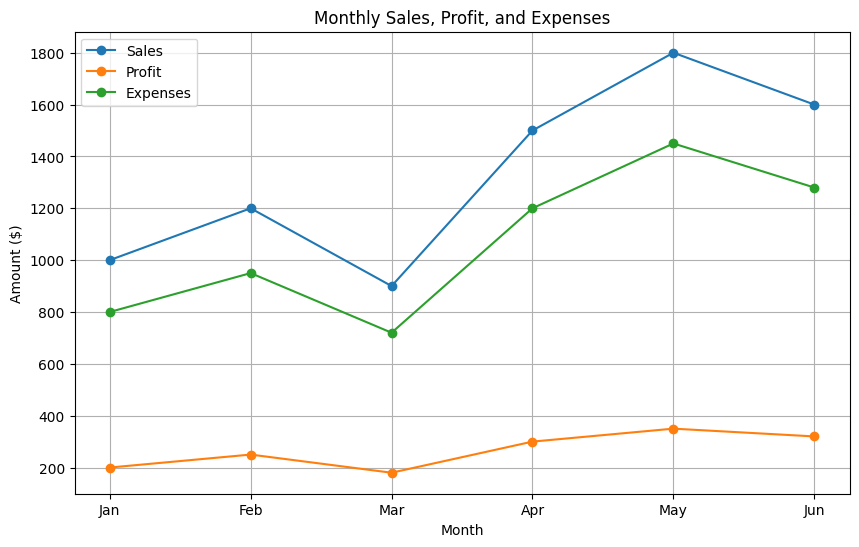

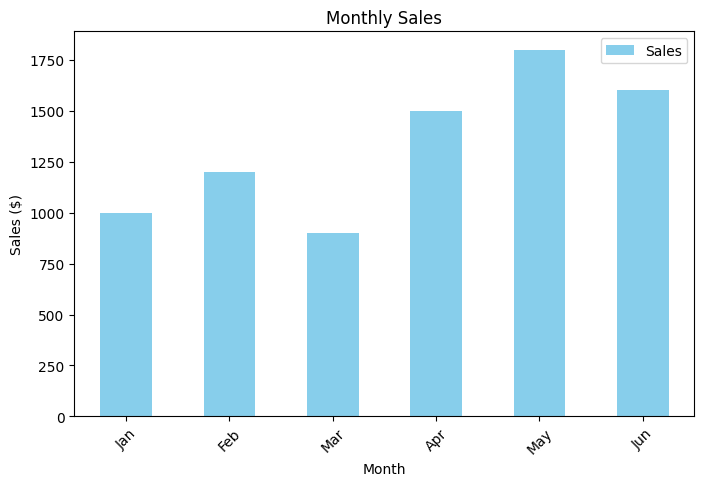

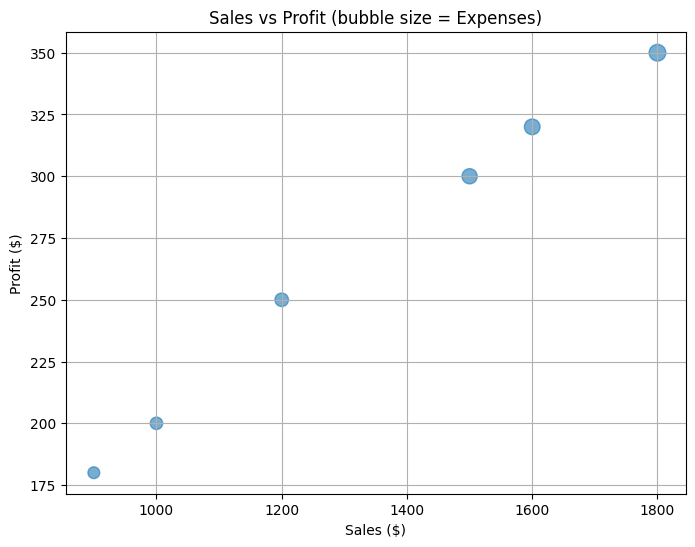

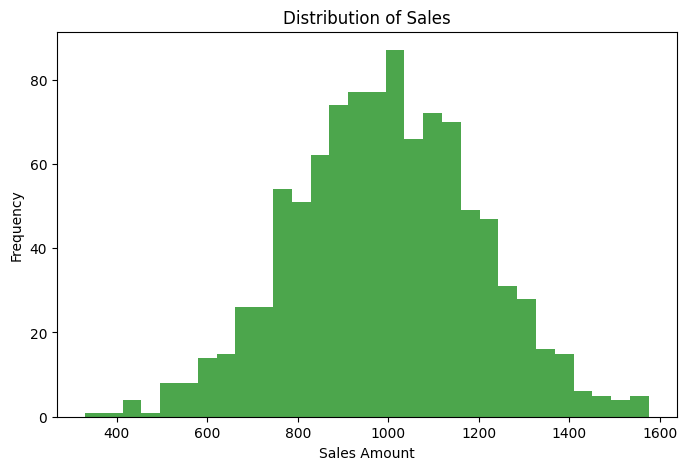

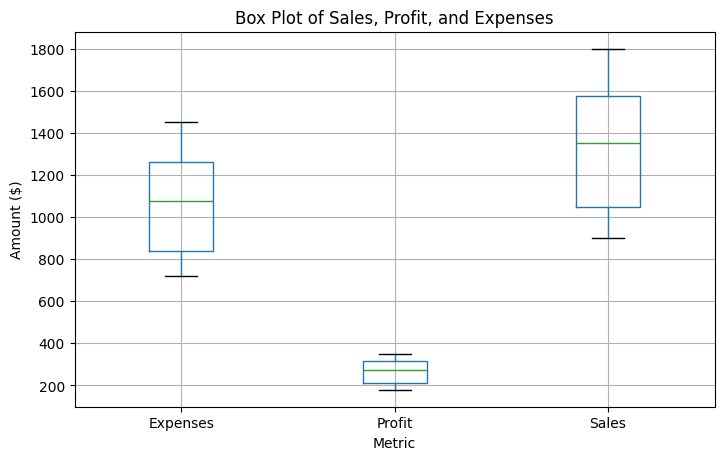

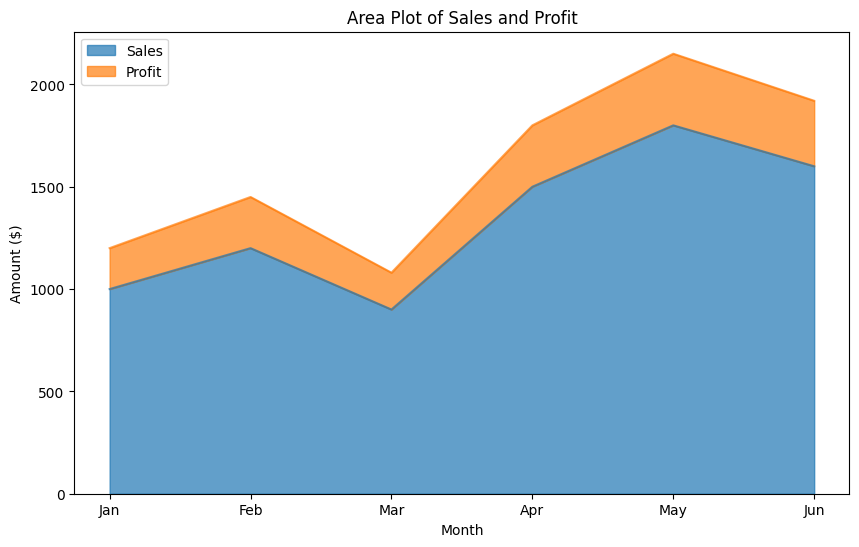

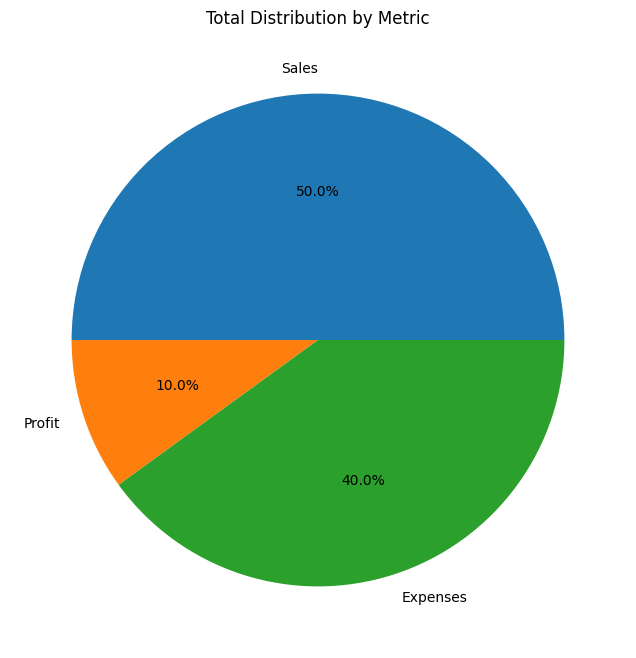

Various plots have been generated above.


In [28]:
# Data Visualization Examples
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set up for notebook display
plt.style.use('default')

# Create sample data
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Sales': [1000, 1200, 900, 1500, 1800, 1600],
    'Profit': [200, 250, 180, 300, 350, 320],
    'Expenses': [800, 950, 720, 1200, 1450, 1280]
}
df = pd.DataFrame(data)
print("Sample DataFrame:")
print(df)

# Line plot
df.plot(x='Month', y=['Sales', 'Profit', 'Expenses'], kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Sales, Profit, and Expenses')
plt.ylabel('Amount ($)')
plt.grid(True)
plt.show()

# Bar plot
df.plot(x='Month', y='Sales', kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Monthly Sales')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Scatter plot
df.plot.scatter(x='Sales', y='Profit', s=df['Expenses']/10, alpha=0.6, figsize=(8, 6))
plt.title('Sales vs Profit (bubble size = Expenses)')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.show()

# Histogram
sales_data = np.random.normal(1000, 200, 1000)
pd.Series(sales_data).plot.hist(bins=30, alpha=0.7, color='green', figsize=(8, 5))
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

# Box plot
df_melted = df.melt(id_vars=['Month'], value_vars=['Sales', 'Profit', 'Expenses'], var_name='Metric', value_name='Amount')
df_melted.boxplot(column='Amount', by='Metric', figsize=(8, 5))
plt.title('Box Plot of Sales, Profit, and Expenses')
plt.suptitle('')
plt.ylabel('Amount ($)')
plt.show()

# Area plot
df.set_index('Month')[['Sales', 'Profit']].plot.area(alpha=0.7, figsize=(10, 6))
plt.title('Area Plot of Sales and Profit')
plt.ylabel('Amount ($)')
plt.show()

# Pie chart
total_by_metric = df[['Sales', 'Profit', 'Expenses']].sum()
total_by_metric.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Total Distribution by Metric')
plt.ylabel('')
plt.show()

print("Various plots have been generated above.")

## Working with SQL Databases

Pandas can read from and write to SQL databases using SQLAlchemy. This section demonstrates basic database operations.

In [30]:
# SQL Database Examples
import pandas as pd
import sqlite3
import os

# Create a SQLite database in memory for demonstration
conn = sqlite3.connect(':memory:')  # Use ':memory:' for in-memory database

# Create sample data
employees_data = {
    'id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'salary': [50000, 60000, 70000, 65000, 55000]
}

departments_data = {
    'dept_id': ['HR', 'IT', 'Finance'],
    'dept_name': ['Human Resources', 'Information Technology', 'Finance'],
    'location': ['NYC', 'LA', 'Chicago']
}

# Create DataFrames
df_employees = pd.DataFrame(employees_data)
df_departments = pd.DataFrame(departments_data)

print("Employees DataFrame:")
print(df_employees)
print("\nDepartments DataFrame:")
print(df_departments)

# Write DataFrames to SQL database
df_employees.to_sql('employees', conn, index=False, if_exists='replace')
df_departments.to_sql('departments', conn, index=False, if_exists='replace')

print("\nTables created in database:")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print([table[0] for table in tables])

# Read entire table
print("\nReading employees table:")
df_from_sql = pd.read_sql('SELECT * FROM employees', conn)
print(df_from_sql)

# Read with conditions
print("\nEmployees in IT department:")
df_it = pd.read_sql('SELECT * FROM employees WHERE department = "IT"', conn)
print(df_it)

# Join tables
print("\nJoined employee and department data:")
df_joined = pd.read_sql('''
    SELECT e.name, e.salary, d.dept_name, d.location
    FROM employees e
    JOIN departments d ON e.department = d.dept_id
''', conn)
print(df_joined)

# Aggregate data
print("\nAverage salary by department:")
df_agg = pd.read_sql('''
    SELECT department, AVG(salary) as avg_salary, COUNT(*) as employee_count
    FROM employees
    GROUP BY department
''', conn)
print(df_agg)

# Update data in database
conn.execute('UPDATE employees SET salary = salary * 1.1 WHERE department = "IT"')
print("\nAfter 10% salary increase for IT department:")
df_updated = pd.read_sql('SELECT * FROM employees', conn)
print(df_updated)

# Close connection
conn.close()

print("\nDatabase operations completed successfully!")

Employees DataFrame:
   id     name department  salary
0   1    Alice         HR   50000
1   2      Bob         IT   60000
2   3  Charlie    Finance   70000
3   4    Diana         IT   65000
4   5      Eve         HR   55000

Departments DataFrame:
   dept_id               dept_name location
0       HR         Human Resources      NYC
1       IT  Information Technology       LA
2  Finance                 Finance  Chicago

Tables created in database:
['employees', 'departments']

Reading employees table:
   id     name department  salary
0   1    Alice         HR   50000
1   2      Bob         IT   60000
2   3  Charlie    Finance   70000
3   4    Diana         IT   65000
4   5      Eve         HR   55000

Employees in IT department:
   id   name department  salary
0   2    Bob         IT   60000
1   4  Diana         IT   65000

Joined employee and department data:
      name  salary               dept_name location
0    Alice   50000         Human Resources      NYC
1      Bob   60000  